In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Configurações de visualização
%matplotlib inline
sns.set(style="whitegrid")

# Carregamento dos dados
dataset = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Visualização inicial dos dados
print("Primeiros registros do dataset:")
display(dataset.head())

Primeiros registros do dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Informações do dataset:")
display(dataset.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

None

**customerID**: Identificador único para cada cliente.

**gender**: Gênero do cliente (masculino ou feminino).

**SeniorCitizen**: Indica se o cliente é um idoso (1) ou não (0).

**Partner**: Indica se o cliente tem um parceiro (Sim) ou não (Não).

**Dependents**: Indica se o cliente tem dependentes (Sim) ou não (Não).

**tenure**: Número de meses que o cliente permaneceu com a empresa.

**PhoneService**: Indica se o cliente tem um serviço telefônico (Sim) ou não (Não).

**MultipleLines**: Indica se o cliente tem múltiplas linhas telefônicas (Sim, Não, Sem serviço telefônico).

**InternetService**: Tipo de serviço de internet do cliente (DSL, Fibra óptica, Não).

**OnlineSecurity**: Indica se o cliente tem segurança online adicionada ao seu serviço de internet (Sim, Não, Sem internet).

**OnlineBackup**: Indica se o cliente tem backup online (Sim, Não, Sem internet).

**DeviceProtection**: Indica se o cliente tem proteção no dispositivo (Sim, Não, Sem internet).

**TechSupport**: Indica se o cliente tem suporte técnico (Sim, Não, Sem internet).

**StreamingTV**: Indica se o cliente tem serviço de streaming de TV (Sim, Não, Sem internet).

**StreamingMovies**: Indica se o cliente tem serviço de streaming de filmes (Sim, Não, Sem internet).

**Contract**: Tipo de contrato do cliente (Mensal, Um ano, Dois anos).

**PaperlessBilling**: Indica se o cliente optou por faturamento sem papel (Sim) ou não (Não).

**PaymentMethod**: Método de pagamento do cliente (transferência eletrônica, cartão de crédito, cheque eletrônico, cheque enviado).

**MonthlyCharges**: A quantia cobrada do cliente mensalmente.

**TotalCharges**: A quantia total cobrada do cliente.

**Churn**: Indica se o cliente deixou a empresa (Sim) ou não (Não).

# EDA

Identificar os Fatores de Churn: Compreender quais características ou comportamentos dos clientes estão mais associados ao risco de eles cancelarem seus serviços.

In [4]:
# Paleta de cores pastel
sns.set_palette('Paired')

# Print da paleta de cores
print("Paleta de cores:")
display(sns.color_palette())

Paleta de cores:


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

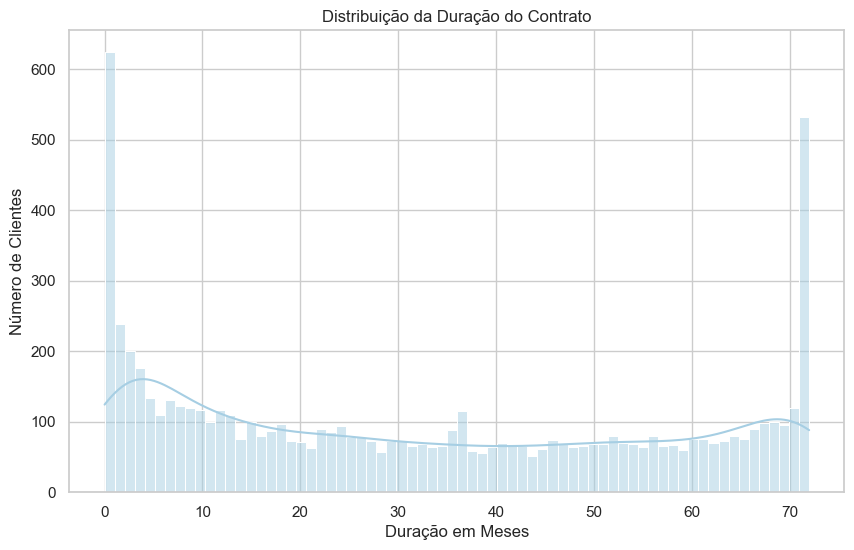

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['tenure'], bins=70, kde=True)
plt.title('Distribuição da Duração do Contrato')
plt.xlabel('Duração em Meses')
plt.ylabel('Número de Clientes')
plt.show()

Podemos observar que muitos clientes costumar cancelar o contrato logo no primeiro mês, após o pico inicial, há uma queda acentuada no número de clientes conforme a duração do contrato aumenta. Observa-se outro pico significativo em torno dos 70 meses. Esse pico pode indicar a existência de contratos de longo prazo que chegam ao fim ou renovam-se nesse período específico, ou ainda, um número significativo de clientes fiéis que continuam com o serviço por muitos anos.

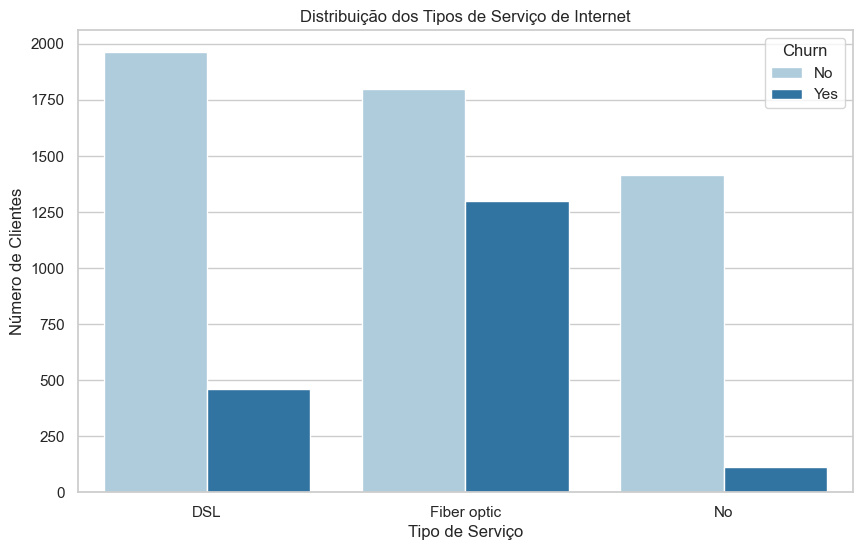

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição dos Tipos de Serviço de Internet')
plt.xlabel('Tipo de Serviço')
plt.ylabel('Número de Clientes')
plt.show()

Embora ambos os serviços (DSL e Fiber optic) tenham um número semelhante de clientes que não cancelaram, a fibra óptica apresenta uma taxa de cancelamento mais alta. Isso pode sugerir que, apesar da fibra óptica oferecer melhor desempenho, pode haver problemas com a satisfação do cliente ou com o custo, levando a um maior cancelamento.

O alto número de clientes sem serviço de internet, combinado com a baixa taxa de cancelamento, pode indicar que esses clientes estão satisfeitos com outros serviços da empresa. Pode também representar uma oportunidade para a empresa converter esses clientes em assinantes de internet, oferecendo pacotes atrativos.

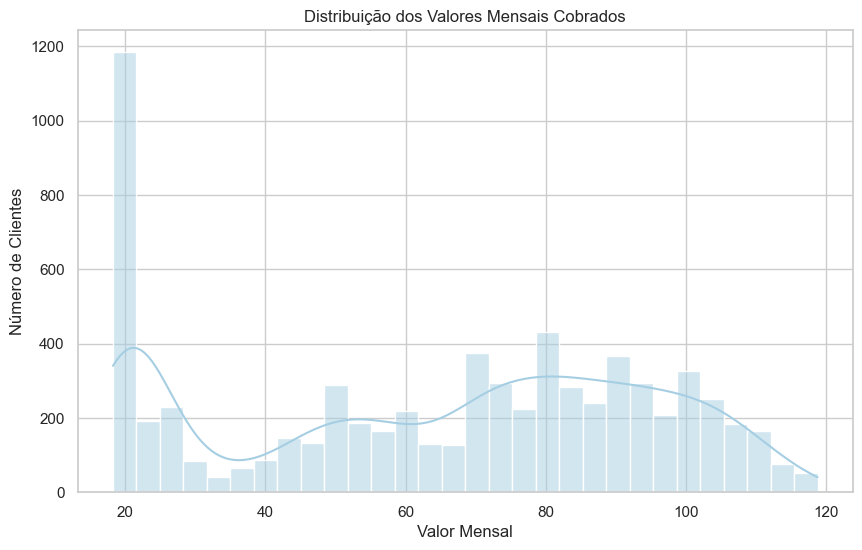

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribuição dos Valores Mensais Cobrados')
plt.xlabel('Valor Mensal')
plt.ylabel('Número de Clientes')
plt.show()

Há um pico muito alto na faixa de valores mensais em torno de $20. Isso indica que um grande número de clientes está pagando valores mensais baixos, o que pode indicar que eles estão utilizando apenas um serviço básico ou um pacote de serviços limitado.

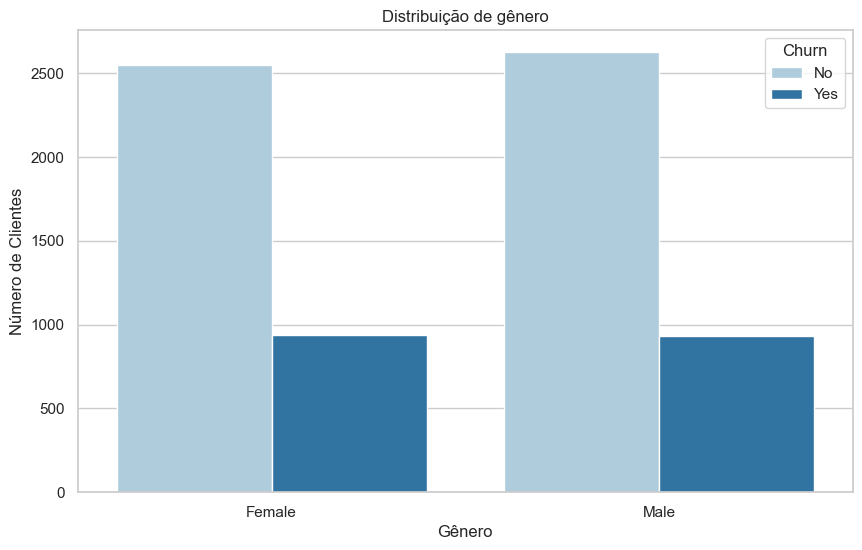

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.show()

O gráfico mostra que a distribuição de churn é bastante semelhante entre clientes femininos e masculinos. Tanto a quantidade de clientes que não cancelaram quanto a quantidade de clientes que cancelaram são praticamente iguais entre os dois gêneros.


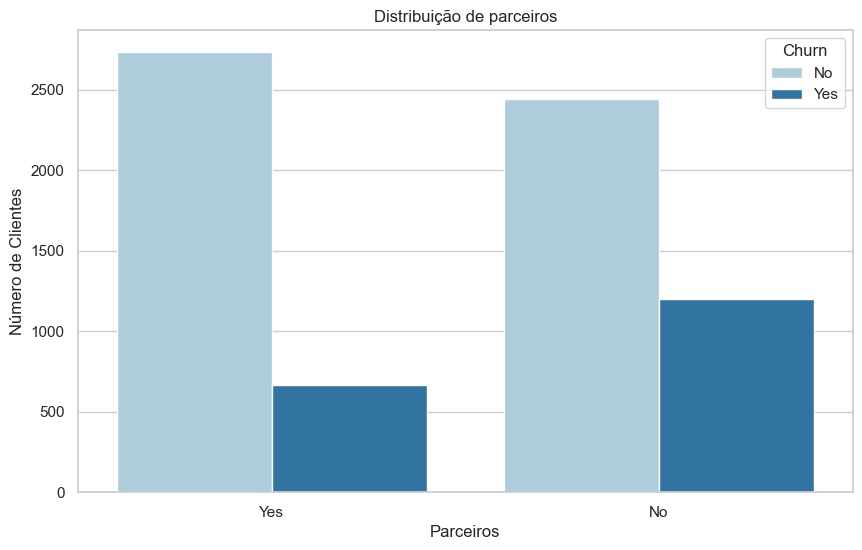

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Partner', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de parceiros')
plt.xlabel('Parceiros')
plt.ylabel('Número de Clientes')
plt.show()

Os clientes com parceiros parecem ter uma taxa de churn menor comparada aos clientes sem parceiros. Isso pode indicar que clientes com suporte social (parceiros) têm mais probabilidade de manter o serviço.

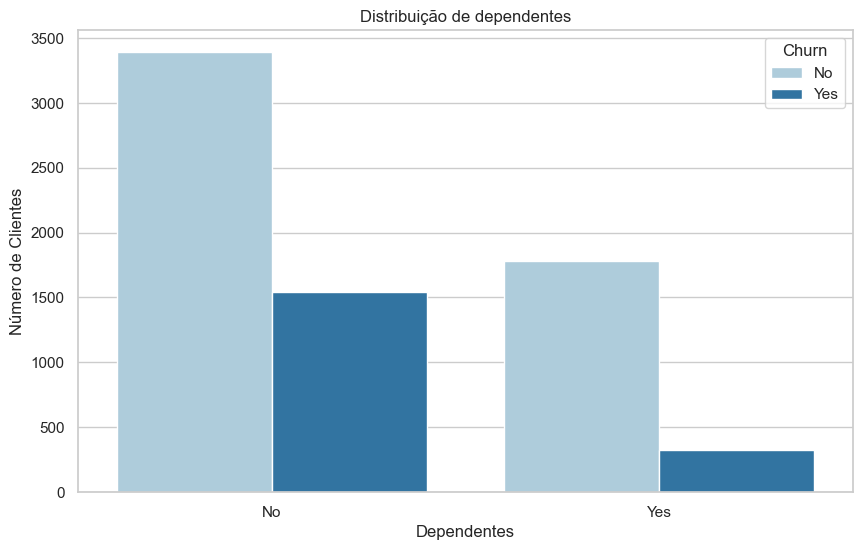

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Número de Clientes')
plt.show()

Os clientes com dependentes parecem ter uma taxa de churn consideravelmente menor comparada aos clientes sem dependentes. Isso pode indicar que clientes com dependentes são mais estáveis e têm mais probabilidade de manter o serviço. Porém a proporção de clientes sem dependentes é maior, então a empresa pode querer focar em estratégias para manter esses clientes.

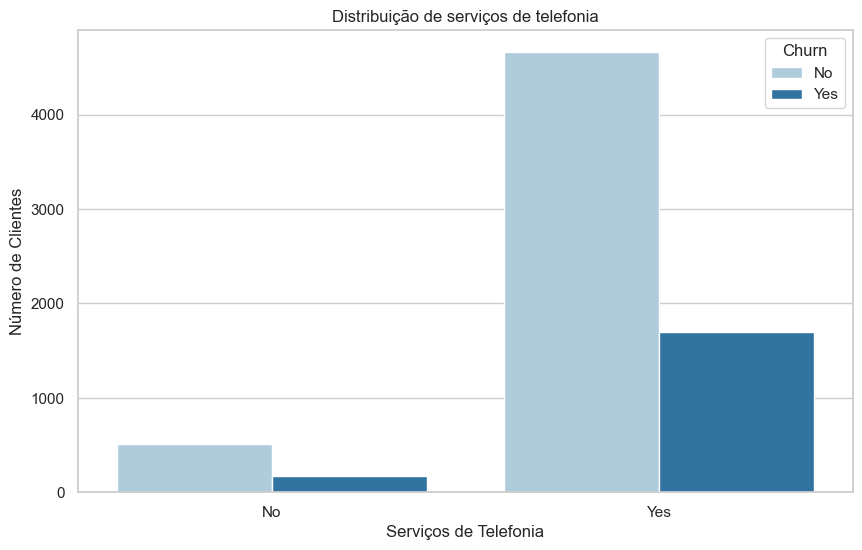

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PhoneService', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de serviços de telefonia')
plt.xlabel('Serviços de Telefonia')
plt.ylabel('Número de Clientes')
plt.show()

A maior parte dos clientes possui serviços de telefonia, e embora a taxa de churn seja menor, ainda é significativa. Isso pode indicar que os serviços de telefonia são essenciais para muitos clientes, mas há espaço para melhorar a retenção.

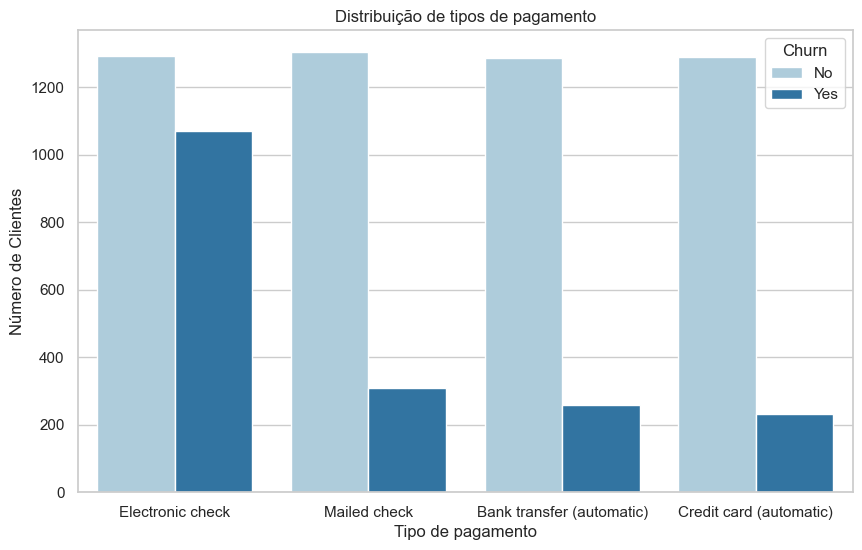

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de tipos de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Número de Clientes')
plt.show()

O método de pagamento Electronic check tem uma taxa de churn significativamente alta comparada aos outros métodos de pagamento. Isso pode sugerir que clientes que escolhem este método de pagamento estão mais propensos a cancelar seus serviços.

Os métodos de pagamento automáticos, como Bank transfer (automatic) e Credit card (automatic), têm taxas de churn mais baixas. Isso indica que a automação nos pagamentos pode estar correlacionada com maior retenção de clientes.

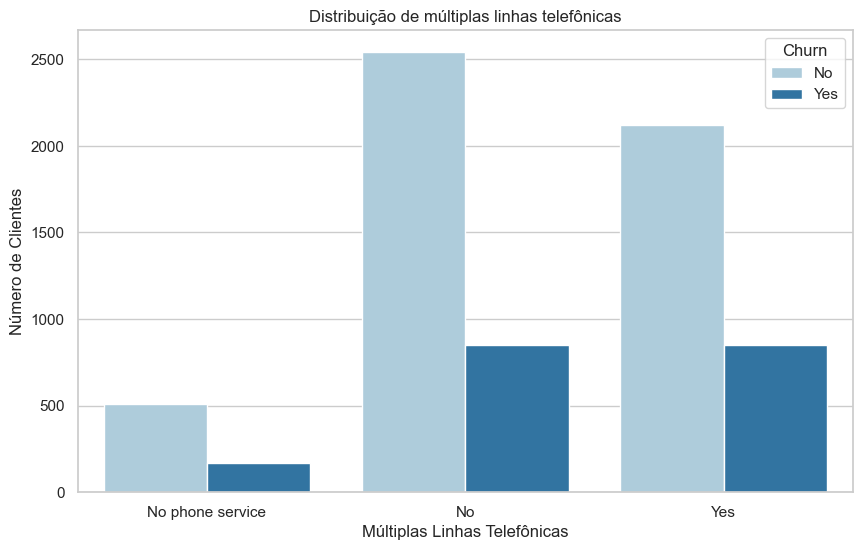

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MultipleLines', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de múltiplas linhas telefônicas')
plt.xlabel('Múltiplas Linhas Telefônicas')
plt.ylabel('Número de Clientes')
plt.show()

A baixa taxa de churn entre clientes sem serviço de telefonia pode indicar que esses clientes estão satisfeitos com outros serviços oferecidos pela empresa, como internet ou TV a cabo.

A taxa de churn é semelhante entre clientes com uma linha e clientes com múltiplas linhas telefônicas, sugerindo que a presença de múltiplas linhas não afeta significativamente a decisão de cancelar o serviço.

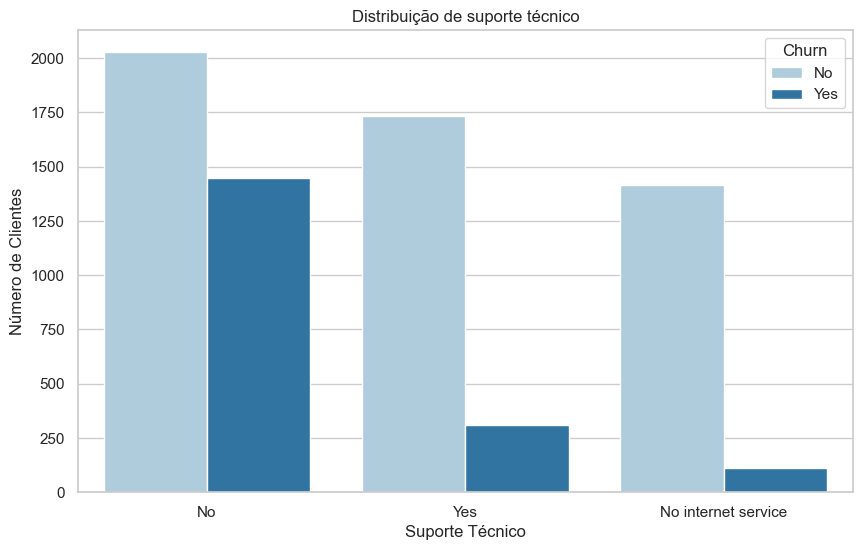

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TechSupport', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de suporte técnico')
plt.xlabel('Suporte Técnico')
plt.ylabel('Número de Clientes')
plt.show()

Clientes que têm suporte técnico têm uma taxa de churn muito menor comparada aos que não têm suporte técnico. Isso sugere que o suporte técnico é um fator importante na retenção de clientes.

A baixa taxa de churn entre clientes sem serviço de internet pode indicar satisfação com outros serviços oferecidos pela empresa, como telefonia ou TV a cabo.

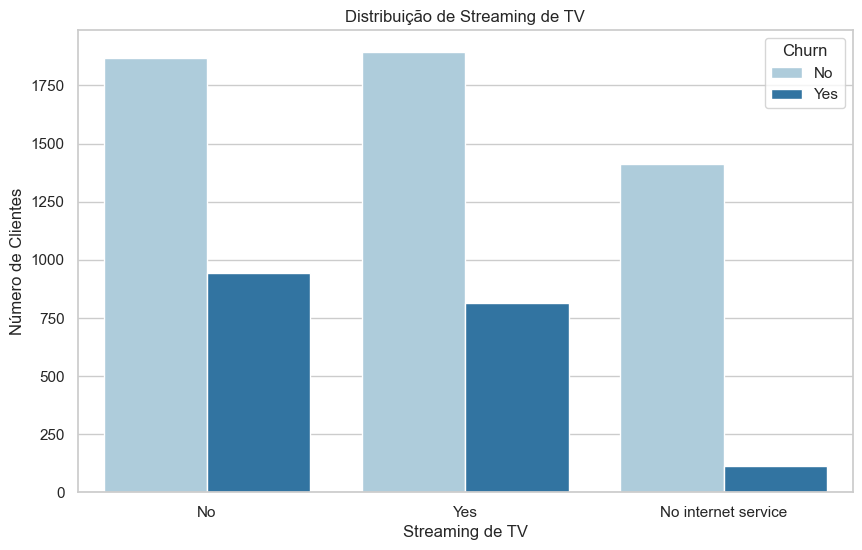

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='StreamingTV', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de Streaming de TV')
plt.xlabel('Streaming de TV')
plt.ylabel('Número de Clientes')
plt.show()

A taxa de churn é semelhante entre clientes que utilizam e não utilizam o serviço de streaming de TV. Isso sugere que a presença ou ausência do serviço de streaming de TV não afeta significativamente a decisão de cancelar o serviço.

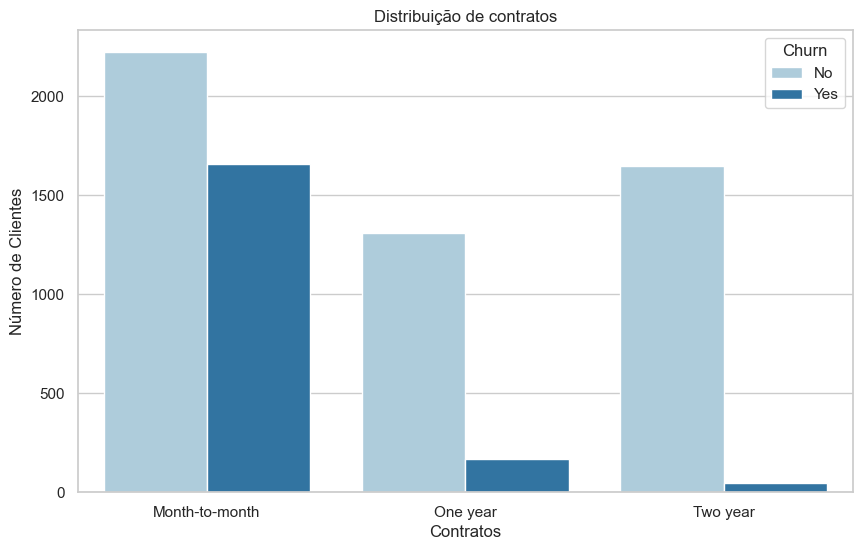

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de contratos')
plt.xlabel('Contratos')
plt.ylabel('Número de Clientes')
plt.show()

A taxa de churn é significativamente maior para clientes com contratos mensais. Isso pode ser devido à flexibilidade que esses contratos oferecem, permitindo que os clientes cancelem facilmente sem penalidades.

Contratos anuais e de dois anos têm taxas de churn muito menores, indicando que os clientes que se comprometem com contratos mais longos são menos propensos a cancelar. Isso pode ser devido a incentivos, descontos ou penalidades de cancelamento antecipado.

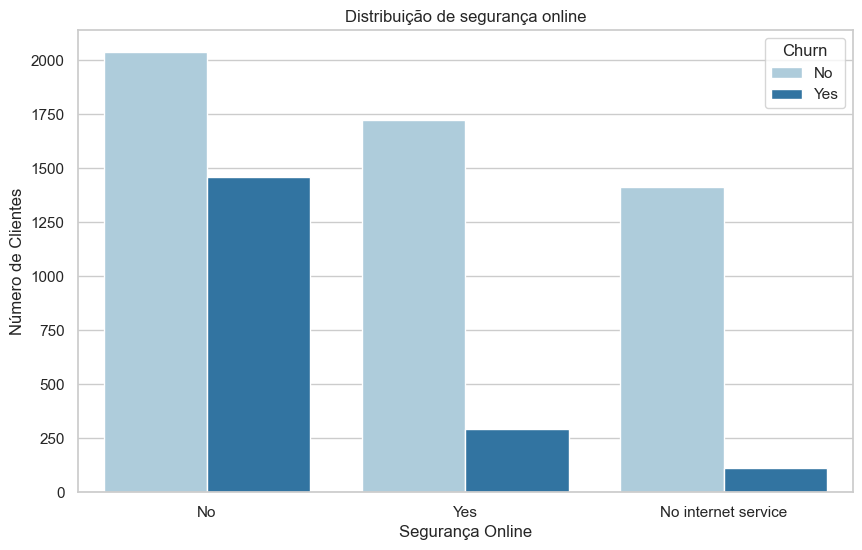

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de segurança online')
plt.xlabel('Segurança Online')
plt.ylabel('Número de Clientes')
plt.show()

Clientes que utilizam serviços de segurança online têm uma taxa de churn significativamente menor comparada aos que não utilizam. Isso sugere que a segurança online é um fator importante para a retenção de clientes.

## Análise de Correlação

In [ ]:
# Convertendo as variáveis categóricas em variáveis dummy menos customerID
dataset_dummies = pd.get_dummies(dataset.drop('customerID', axis=1))

# Calculando a matriz de correlação
correlation_matrix = dataset_dummies.corr()

In [27]:
# Filtrando para mostrar apenas correlações com 'Churn_Yes'
churn_correlations = correlation_matrix['Churn_Yes']
significant_corr = churn_correlations[(churn_correlations > 0.1) | (churn_correlations < -0.1)]

# Visualizando as correlações significativas com 'Churn' na ordem
print(significant_corr.sort_values(ascending=False))

Churn_Yes                                  1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
PaymentMethod_Bank transfer (automatic)   -0.117937
InternetService_DSL                       -0.124214
PaymentMethod_Credit card (automatic)     -0.134302
Partner_Yes                               -0.150448
Dependents_Y

Há uma correlação positiva forte entre contratos mensais e churn. Isso confirma a análise anterior de que clientes com contratos mensais são mais propensos a cancelar o serviço. A flexibilidade dos contratos mensais permite que os clientes cancelem facilmente, o que pode contribuir para essa correlação.

Há uma correlação positiva significativa entre a ausência de segurança online e churn. Clientes que não têm serviços de segurança online são mais propensos a cancelar. Isso sugere que a segurança online é um fator importante para a retenção de clientes.

Similar à segurança online, a ausência de suporte técnico está positivamente correlacionada com churn. Clientes que não têm acesso a suporte técnico são mais propensos a cancelar o serviço. Isso destaca a importância de oferecer suporte técnico eficaz para reter clientes.

A correlação positiva entre o serviço de internet de fibra óptica e churn pode parecer contraintuitiva, uma vez que a fibra óptica geralmente oferece melhor desempenho. No entanto, pode indicar que problemas específicos ou expectativas não atendidas em relação ao serviço de fibra óptica estão levando os clientes a cancelar.

Há uma correlação positiva significativa entre o método de pagamento por cheque eletrônico e churn. Isso pode sugerir que clientes que usam cheque eletrônico podem ter características ou preferências que os tornam mais propensos a cancelar, ou pode estar relacionado a problemas específicos com este método de pagamento.

In [28]:
# Filtrando para mostrar apenas correlações com 'Churn_No'
churn_correlations = correlation_matrix['Churn_No']
significant_corr = churn_correlations[(churn_correlations > 0.1) | (churn_correlations < -0.1)]

# Visualizando as correlações significativas com 'Churn' na ordem
print(significant_corr.sort_values(ascending=False))

Churn_No                                   1.000000
tenure                                     0.352229
Contract_Two year                          0.302253
OnlineSecurity_No internet service         0.227890
InternetService_No                         0.227890
TechSupport_No internet service            0.227890
DeviceProtection_No internet service       0.227890
OnlineBackup_No internet service           0.227890
StreamingMovies_No internet service        0.227890
StreamingTV_No internet service            0.227890
PaperlessBilling_No                        0.191825
Contract_One year                          0.177820
OnlineSecurity_Yes                         0.171226
TechSupport_Yes                            0.164674
Dependents_Yes                             0.164221
Partner_Yes                                0.150448
PaymentMethod_Credit card (automatic)      0.134302
InternetService_DSL                        0.124214
PaymentMethod_Bank transfer (automatic)    0.117937
StreamingTV_

A correlação positiva com tenure indica que clientes que estão há mais tempo com a empresa são menos propensos a cancelar o serviço. Isso sugere que a lealdade aumenta com o tempo, possivelmente devido a um maior nível de satisfação ou a criação de barreiras para o cancelamento.

Clientes com contratos de dois anos têm uma correlação positiva significativa com a retenção. Isso indica que esses clientes são menos propensos a cancelar o serviço, possivelmente devido a incentivos ou penalidades de cancelamento antecipado associadas a contratos de longo prazo.

Clientes que não possuem serviço de internet têm uma correlação positiva com a retenção no contexto de segurança online. Isso sugere que a falta de serviço de internet está associada a outros fatores de satisfação que mantêm os clientes, como telefonia ou TV a cabo.

Similar ao ponto anterior, a ausência de serviço de internet está correlacionada positivamente com a retenção. Clientes que não usam o serviço de internet podem estar satisfeitos com outros serviços oferecidos pela empresa.

Clientes sem serviço de internet também mostram uma correlação positiva com a retenção no contexto de suporte técnico. Isso sugere que esses clientes podem estar satisfeitos com os serviços não relacionados à internet que a empresa oferece.

## Quais características estão mais associadas ao churn?

In [34]:
# Dividindo os dados em características e target
X = dataset_dummies.drop(['Churn_Yes', 'Churn_No'], axis=1)  # Características
y = dataset_dummies['Churn_Yes']  # Churn_Yes ja tem 0 e 1

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
# Definindo o modelo
tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 5, 7, 10, 12, 15]
}

# Configurando o Grid Search
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Treinando o Grid Search
grid_search_tree.fit(X_train, y_train)

# Melhores parâmetros e melhor score
print("Melhores parâmetros:", grid_search_tree.best_params_)
print("Melhor acurácia de cross-validation:", grid_search_tree.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor acurácia de cross-validation: 0.7787018255578093


In [110]:
# Definindo o modelo
forest = RandomForestClassifier(random_state=42)

# Definindo os parâmetros para teste
param_grid_forest = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 5]
}

# Configurando o Grid Search
grid_search_forest = GridSearchCV(estimator=forest, param_grid=param_grid_forest, cv=5, scoring='accuracy', verbose=1)

# Treinando o Grid Search
grid_search_forest.fit(X_train, y_train)

# Melhores parâmetros e melhor score
print("Melhores parâmetros:", grid_search_forest.best_params_)
print("Melhor acurácia de cross-validation:", grid_search_forest.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Melhores parâmetros: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Melhor acurácia de cross-validation: 0.7983772819472618


**max_depth**: É a profundidade máxima da árvore. Quanto maior a profundidade, mais complexa a árvore e mais propensa a overfitting.

**min_samples_split**: É o número mínimo de amostras necessárias para dividir um nó interno. Quanto maior o número, menos divisões ocorrerão, o que pode levar a uma árvore mais generalizada.

**min_samples_leaf**: É o número mínimo de amostras necessárias para ser uma folha. Quanto maior o número, menos divisões ocorrerão, o que pode levar a uma árvore mais generalizada.

**max_features**: É o número máximo de características a serem consideradas para dividir um nó. Quanto menor o número, mais generalizada a árvore. Max_features='sqrt' é uma regra prática onde o número de características usadas em cada divisão é igual à raiz quadrada do número total de características. Por exemplo, se há 100 características, cada divisão usará 10 características aleatórias.

**n_estimators**: É o número de árvores na floresta. Quanto mais árvores, mais robusto o modelo, mas também mais lento.

In [111]:
# Acurácia nos dados de treino
print("Acurácia nos dados de treino:")
print("Árvore de Decisão:", grid_search_tree.score(X_train, y_train))
print("Floresta Aleatória:", grid_search_forest.score(X_train, y_train))

Acurácia nos dados de treino:
Árvore de Decisão: 0.865314401622718
Floresta Aleatória: 0.9967545638945233


In [112]:
# Avaliação da Árvore de Decisão nos dados de teste
tree_predictions = grid_search_tree.predict(X_test)
print("Árvore de Decisão - Relatório de Classificação:")
print(classification_report(y_test, tree_predictions))

# Avaliação da Floresta Aleatória
forest_predictions = grid_search_forest.predict(X_test)
print("Floresta Aleatória - Relatório de Classificação:")
print(classification_report(y_test, forest_predictions))

Árvore de Decisão - Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.83      0.87      0.85      1539
        True       0.60      0.52      0.56       574

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113

Floresta Aleatória - Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1539
        True       0.68      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
# Importância das características para a Floresta Aleatória
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': grid_search_forest.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Importância das Características:")
print(feature_importances.head())